In [41]:
# load data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
!pip install minisom
from minisom import MiniSom
import math  

In [0]:
# load data
data =pd.read_csv('/content/gdrive/My Drive/data_wordvectors_pers.csv', sep=',').iloc[:, 1:]

indexvec = []
for col in range(0, len(data.columns)-2): 
  indexvec.append("x" + str(col+1))
indexvec
vectors = data[indexvec]
vectors = np.array(vectors)

In [0]:
data

In [0]:
category_color = {'CDU' : 'black',
                 'SPD': 'red',
                 'Grüne' : 'green',
                 'AfD' : 'brown',
                 'Linke': 'darkred',
                 'FDP' : 'yellow'}
  
category_color2 = {'Annegreth Kramp-Karrenbauer': 'black',
                  'Angela Merkel': 'black',
                  'Katharina Barley': 'red',
                  'Andrea Nahles': 'red',
                   "Cem Özdemir":'limegreen',
                 "Kathrin Goering-Eckardt":'limegreen',
                 "Alice Weidel": 'brown',
                 "Jörg Meuthen": 'brown',
                 "Sarah Wagenknecht": 'darkred',
                 "Christian Lindner": 'yellow'}
category_short = {'Annegreth Kramp-Karrenbauer': 'AKK',
                  'Angela Merkel': 'AM',
                  'Katharina Barley': 'KB',
                  'Andrea Nahles': 'AN',
                   "Cem Özdemir":'CÖ',
                 "Kathrin Goering-Eckardt":'KGE',
                 "Alice Weidel": 'AW',
                 "Jörg Meuthen": 'JM',
                 "Sarah Wagenknecht": 'SW',
                 "Christian Lindner": 'CL'}

In [0]:
# choose map dimension as number of samples so that
# each neuron gets mapped to a sample
# in our case: one tweet
map_dim = 8 #round(5*math.sqrt(len(vectors)))

print("Training...")
som = MiniSom(map_dim, map_dim, 30, sigma=1.0, random_seed=1)
som.pca_weights_init(vectors)
print("\n...ready!")


dicussion on how many neurons to take:
https://www.researchgate.net/post/How_many_nodes_for_self-organizing_maps

In [0]:
# train SOM
# due to our large observation size this might take some time...
som.train_batch(vectors, len(vectors)*10)

In [0]:
user_map = som.labels_map(vectors, data['name'])

In [63]:
user_map.items()

dict_items([((2, 0), Counter({'Annegreth Kramp-Karrenbauer': 1, 'Angela Merkel': 1})), ((0, 0), Counter({'Katharina Barley': 1, 'Christian Lindner': 1})), ((3, 3), Counter({'Andrea Nahles': 1})), ((3, 2), Counter({'Cem Özdemir': 1})), ((5, 5), Counter({'Kathrin Goering-Eckardt': 1})), ((4, 4), Counter({'Alice Weidel': 1})), ((0, 1), Counter({'Jörg Meuthen': 1})), ((4, 1), Counter({'Sarah Wagenknecht': 1}))])

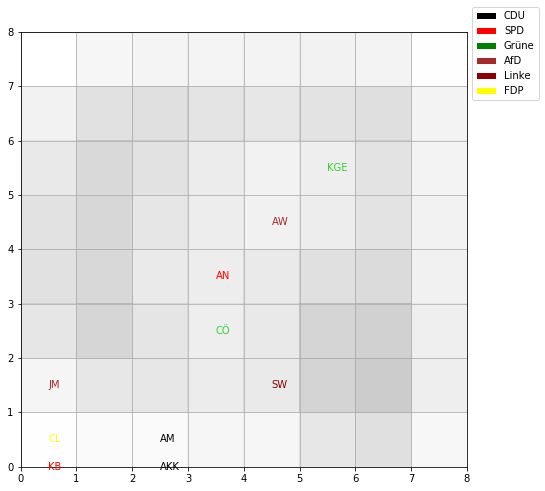

In [64]:
plt.figure(figsize=(map_dim, map_dim))
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(map_dim+1))
plt.yticks(np.arange(map_dim+1))
plt.grid()

for p, name in user_map.items():
    name = list(name)
    x = p[0] + .5
    y = p[1] - .5
    for i, c in enumerate(name):
        off_set = (i+1)/len(name) - 0.05
        plt.text(x, y+off_set, category_short[c], color = category_color2[c],  fontsize=10)
        #plt.plot(x, y+off_set, 'ro', color = category_color2[c],)
legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
plt.show()

Sources:
https://github.com/JustGlowing/minisom/blob/master/examples/DemocracyIndex.ipynb